In [1]:
import pickle
import os
import numpy as np
import torch
import pandas as pd

In [45]:
from plot_utils import *

In [17]:
from importlib import reload
import plot_utils
reload(plot_utils)
from plot_utils import *

# Load data

## threshold 1e-6 with complex64

In [3]:
params_list=[
({'xj':'1-3,2-3','en':2000,'anc':False},{'p_ctrl':np.linspace(0,0.6,61),'p_proj':np.linspace(0,1,101),'s':np.arange(1),'L':np.array([8,12,16])}),
# ({'xj':'1-3,2-3','en':1000,'anc':False},{'p_ctrl':np.linspace(0,0.6,61),'p_proj':np.linspace(0,1,101),'s':np.arange(2),'L':np.array([20])}),
# ({'xj':'1-3,2-3','en':500,'anc':False},{'p_ctrl':np.linspace(0,0.6,61),'p_proj':np.linspace(0,0.6,61),'s':np.arange(4),'L':np.array([20])}),
# ({'xj':'1-3,2-3','en':60,'anc':False},{'p_ctrl':np.linspace(0,0.6,61),'p_proj':np.linspace(0,0.6,61),'s':np.arange(32),'L':np.array([24])})
]
for fixed_params,vary_params in params_list:
    data_1_3_S0_dict=generate_params(
        fixed_params=fixed_params,
        vary_params=vary_params,
        fn_template='CT_En{en}_pctrl({p_ctrl:.2f},{p_ctrl:.2f},1)_pproj({p_proj:.2f},{p_proj:.2f},1)_L({L},{L+2},2)_xj({xj})_seed{s}_64{"_anc"*anc}.pickle',
        fn_dir_template='Data/Metrics/{xj}_S0/',
        input_params_template='{p:.3f} {L} {seed} {ancilla}',
        load_data=load_pickle,
        filename=None,
        filelist=None,
        load=True,
        data_dict=None,
        data_dict_file='xj({xj}){"_anc"*anc}.pickle', 
    )


df_1_3_S0=convert_pd(data_1_3_S0_dict,names=['Metrics','L','p_ctrl','p_proj'])

Loading data_dict Data/Metrics/1-3,2-3_S0/xj(1-3,2-3).pickle


generate_params: 100%|██████████| 18483/18483 [00:00<00:00, 21915.38it/s]


In [7]:
len(data_1_3_S0_dict['fn'])

609

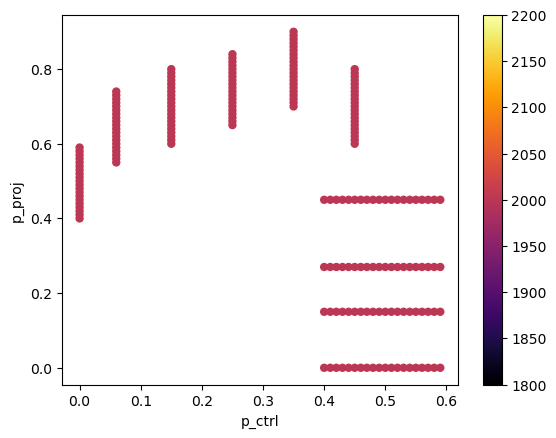

In [8]:
visualize_dataset(df_1_3_S0,params={'Metrics':'O','L':16},xlabel='p_ctrl',ylabel='p_proj')

## load all singular value

In [62]:
params_list=[
# ({'xj':'1-3,2-3','en':2000,'anc':False},{'p_ctrl':np.linspace(0,0.6,61),'p_proj':np.linspace(0,1,101),'s':np.arange(1),'L':np.array([8,12,16])}),
# ({'xj':'1-3,2-3','en':500,'anc':False},{'p_ctrl':np.linspace(0,0.6,61),'p_proj':np.linspace(0,1,101),'s':np.arange(4),'L':np.array([20])}),
({'xj':'1-3,2-3','en':30,'anc':False},{'p_ctrl':np.linspace(0,0.6,61),'p_proj':np.linspace(0,0.6,61),'s':np.arange(64),'L':np.array([24])})
]
# data_1_3_S0_sv_dict={'fn':set()}
for fixed_params,vary_params in params_list:
    data_1_3_S0_sv_dict=generate_params(
        fixed_params=fixed_params,
        vary_params=vary_params,
        fn_template='CT_En{en}_pctrl({p_ctrl:.2f},{p_ctrl:.2f},1)_pproj({p_proj:.2f},{p_proj:.2f},1)_L({L},{L+2},2)_xj({xj})_seed{s}_128{"_anc"*anc}_sv.pickle',
        fn_dir_template='Data/Metrics/{xj}_sv/',
        input_params_template='{p:.3f} {L} {seed} {ancilla}',
        load_data=load_pickle,
        filename=None,
        filelist=None,
        load=True,
        data_dict=data_1_3_S0_sv_dict,
        # data_dict_file='xj({xj})_128{"_anc"*anc}.pickle', 
    )


# df_1_3_S0_sv={threshold:convert_pd_0(data_1_3_S0_sv_dict,names=['Metrics','L','p_ctrl','p_proj'],threshold=threshold) for threshold in [1e-5,1e-6,1e-7,1e-8,1e-9,1e-10,1e-11,1e-12,1e-13,1e-14,1e-15,1e-16]}


generate_params:   0%|          | 0/238144 [00:00<?, ?it/s]

generate_params: 100%|██████████| 238144/238144 [01:22<00:00, 2871.05it/s] 


In [63]:
fns=set(os.listdir('Data/Metrics/1-3,2-3_sv'))

In [64]:
len(data_1_3_S0_sv_dict['fn'])

2952

In [65]:
[fn for fn in fns-data_1_3_S0_sv_dict['fn'] if '128' in fn]

['xj(1-3,2-3)_128.pickle', 'xj(1-3,2-3)_128_bak.pickle']

In [66]:
df_1_3_S0_sv={threshold:convert_pd_0(data_1_3_S0_sv_dict,names=['Metrics','L','p_ctrl','p_proj'],threshold=threshold) for threshold in [1e-5,1e-6,1e-7,1e-8,1e-9,1e-10,1e-11,1e-12,1e-13,1e-14,1e-15,1e-16]}


In [5]:
del data_1_3_S0_sv_dict

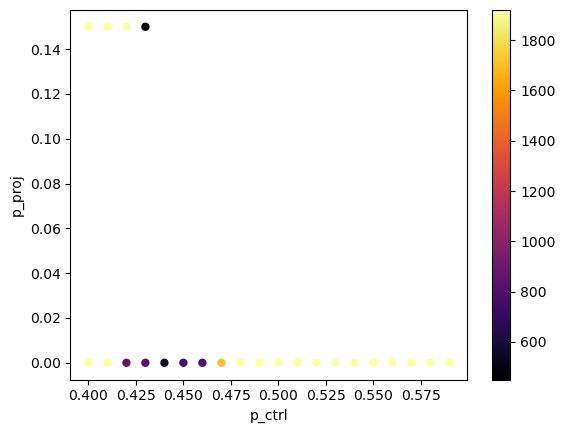

In [67]:
visualize_dataset(df_1_3_S0_sv[1e-15],params={'Metrics':'O','L':24},xlabel='p_ctrl',ylabel='p_proj')

In [68]:
with open('df_1_3_S0_sv.pickle','wb') as f:
    pickle.dump(df_1_3_S0_sv,f)

In [ ]:
with open('df_1_3_S0_sv.pickle','rb') as f:
    df_1_3_S0_sv=pickle.load(f)

# Plot

### TMI mean

In [8]:
import matplotlib.pyplot as plt

(0.4, 0.6)

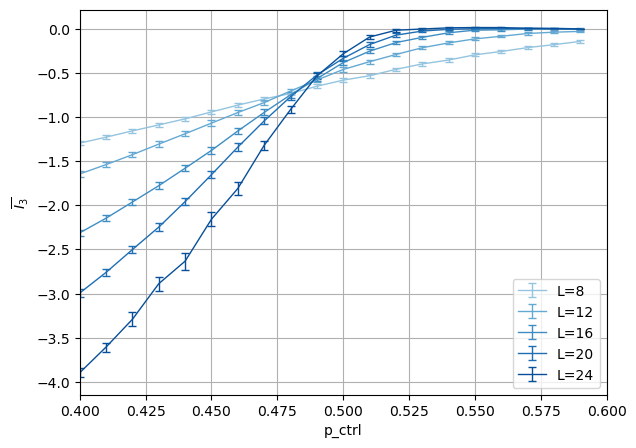

In [70]:
plot_line_inset(df=df_1_3_S0_sv[1e-15],
L_list=np.arange(8,26,4),inset1=False,
xlim1=[.28,.32],
ylim1=[.15,.4],
ax_inset_pos1=[.13,.45,.4,.3],inset2=False,
xlim2=[0.47,0.51],
ylim2=[.3,.5],
ax_inset_pos2=[.1,.3,.4,.5],metrics='TMI',
x_name='p_ctrl',
fixed_params={'p_proj':0},
yscale=None,
errorbar=True,
filename=None,
)
plt.gca().set_xlim([.4,.6])

In [83]:
dc=DataCollapse(df=df_1_3_S0_sv[1e-15],params={'Metrics':'TMI','p_proj':0},Lmin=12,Lmax=24,p_range=[0.45,0.55],p_dim=2)
dc.datacollapse(nu=1.,p_c=0.481,)

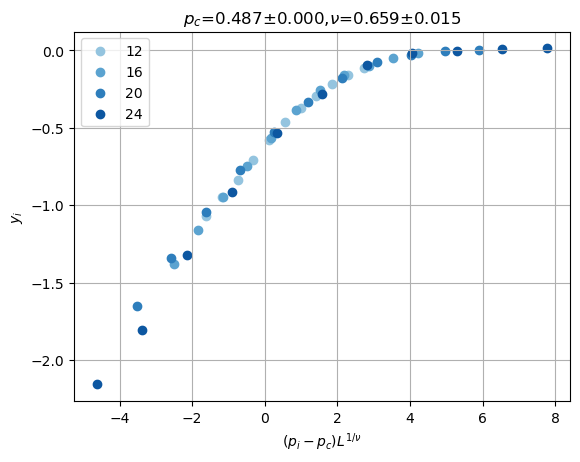

In [84]:
dc.plot_data_collapse()

(0.4, 0.6)

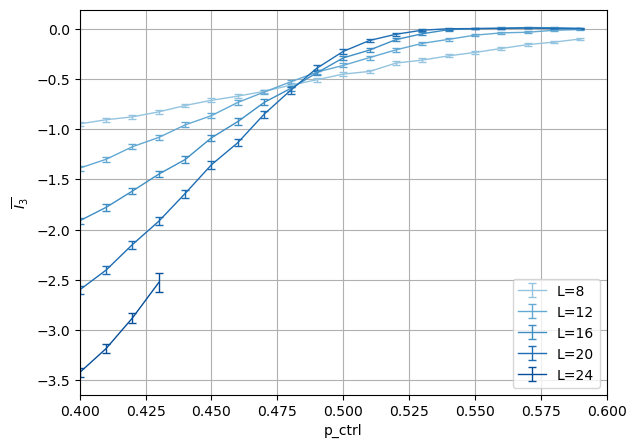

In [85]:
plot_line_inset(df=df_1_3_S0_sv[1e-15],
L_list=np.arange(8,26,4),inset1=False,
xlim1=[.28,.32],
ylim1=[.15,.4],
ax_inset_pos1=[.13,.45,.4,.3],inset2=False,
xlim2=[0.47,0.51],
ylim2=[.3,.5],
ax_inset_pos2=[.1,.3,.4,.5],metrics='TMI',
x_name='p_ctrl',
fixed_params={'p_proj':0.15},
yscale=None,
errorbar=True,
filename=None,
)
plt.gca().set_xlim([.4,.6])

In [24]:
dc=DataCollapse(df=df_1_3_S0_sv[1e-15],params={'Metrics':'TMI','p_proj':0.15},Lmin=12,Lmax=24,p_range=[0.45,0.55],p_dim=2)
dc.datacollapse(nu=1.3,p_c=0.471,)

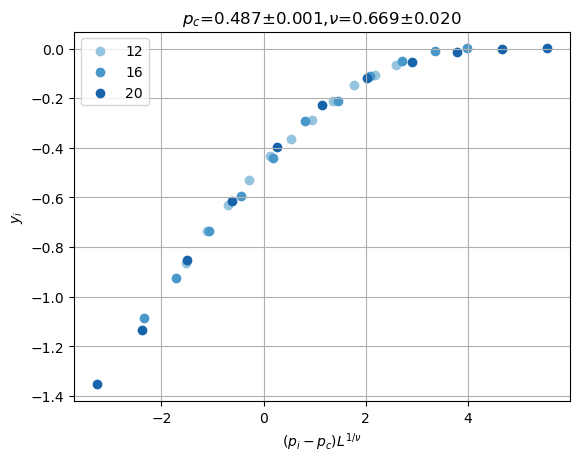

In [25]:
dc.plot_data_collapse()

(0.4, 0.6)

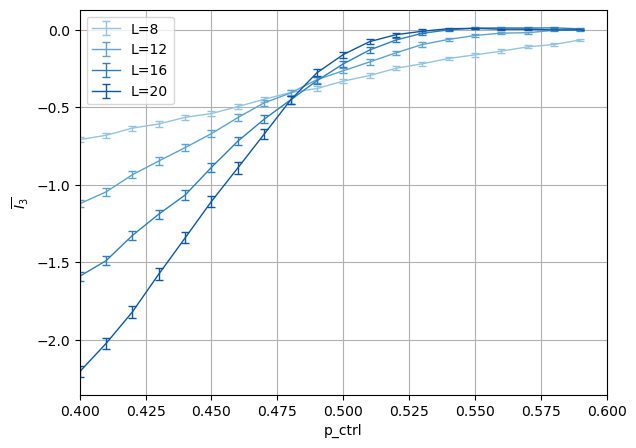

In [29]:
plot_line_inset(df=df_1_3_S0_sv[1e-15],
L_list=np.arange(8,24,4),inset1=False,
xlim1=[.28,.32],
ylim1=[.15,.4],
ax_inset_pos1=[.13,.45,.4,.3],inset2=False,
xlim2=[0.47,0.51],
ylim2=[.3,.5],
ax_inset_pos2=[.1,.3,.4,.5],metrics='TMI',
x_name='p_ctrl',
fixed_params={'p_proj':0.27},
yscale=None,
errorbar=True,
filename=None,
)
plt.gca().set_xlim([.4,.6])

In [10]:
dc=DataCollapse(df=df_1_3_S0_sv[1e-15],params={'Metrics':'TMI','p_proj':0.27},Lmin=12,Lmax=24,p_range=[0.45,0.55],p_dim=2)
dc.datacollapse(nu=1.3,p_c=0.471,)

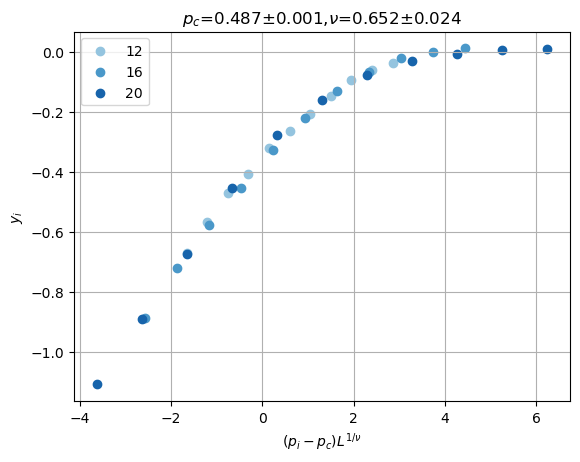

In [11]:
dc.plot_data_collapse()

(0.4, 0.6)

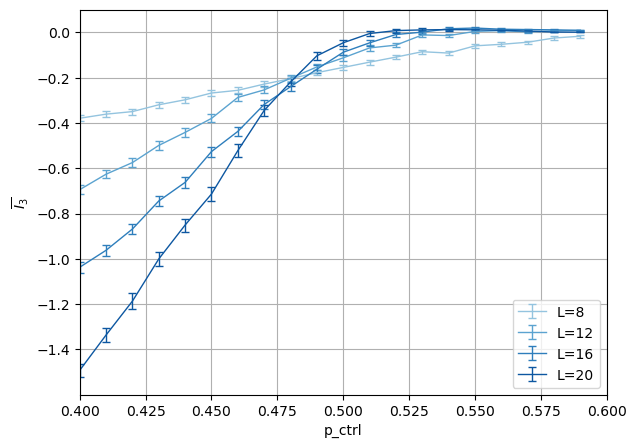

In [13]:
plot_line_inset(df=df_1_3_S0_sv[1e-15],
L_list=np.arange(8,24,4),inset1=False,
xlim1=[.28,.32],
ylim1=[.15,.4],
ax_inset_pos1=[.13,.45,.4,.3],inset2=False,
xlim2=[0.47,0.51],
ylim2=[.3,.5],
ax_inset_pos2=[.1,.3,.4,.5],metrics='TMI',
x_name='p_ctrl',
fixed_params={'p_proj':0.45},
yscale=None,
errorbar=True,
filename=None,
)
plt.gca().set_xlim([.4,.6])

In [14]:
dc=DataCollapse(df=df_1_3_S0_sv[1e-15],params={'Metrics':'TMI','p_proj':0.45},Lmin=12,Lmax=24,p_range=[0.45,0.55],p_dim=2)
dc.datacollapse(nu=1.3,p_c=0.486,)

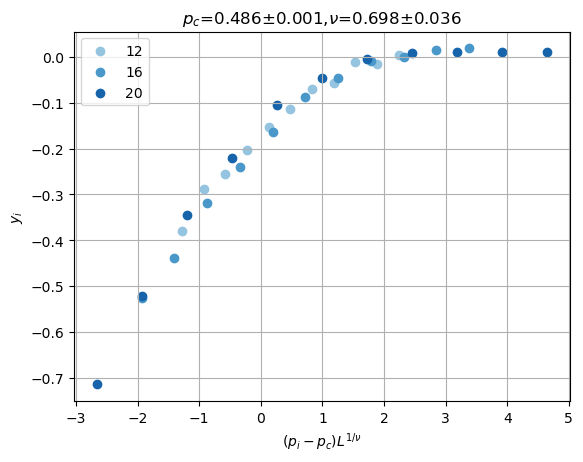

In [15]:
dc.plot_data_collapse()

(0.4, 0.6)

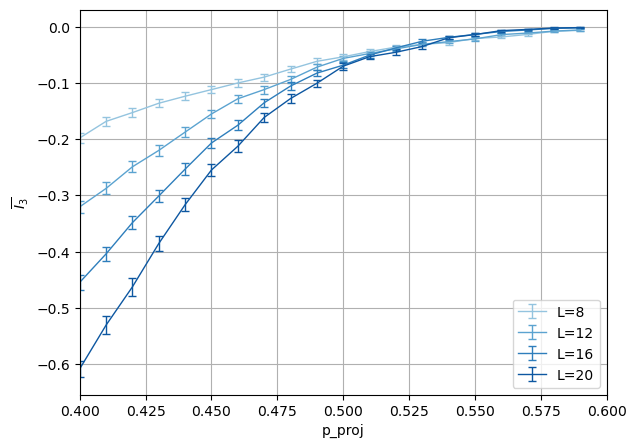

In [16]:
plot_line_inset(df=df_1_3_S0_sv[1e-15],
L_list=np.arange(8,24,4),inset1=False,
xlim1=[.28,.32],
ylim1=[.15,.4],
ax_inset_pos1=[.13,.45,.4,.3],inset2=False,
xlim2=[0.47,0.51],
ylim2=[.3,.5],
ax_inset_pos2=[.1,.3,.4,.5],metrics='TMI',
x_name='p_proj',
fixed_params={'p_ctrl':0.},
yscale=None,
errorbar=True,
filename=None,
)
plt.gca().set_xlim([.4,.6])

In [17]:
dc=DataCollapse(df=df_1_3_S0_sv[1e-15],params={'Metrics':'TMI','p_ctrl':0},Lmin=12,Lmax=24,p_range=[0.4,0.59],p_dim=2)
dc.datacollapse(nu=1.3,p_c=0.501,)

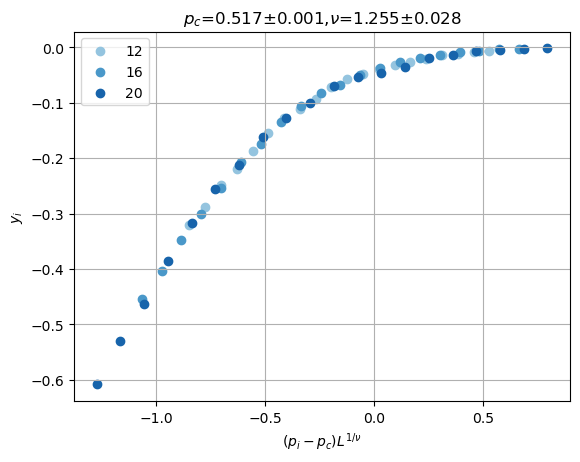

In [18]:
dc.plot_data_collapse()    

(0.55, 0.75)

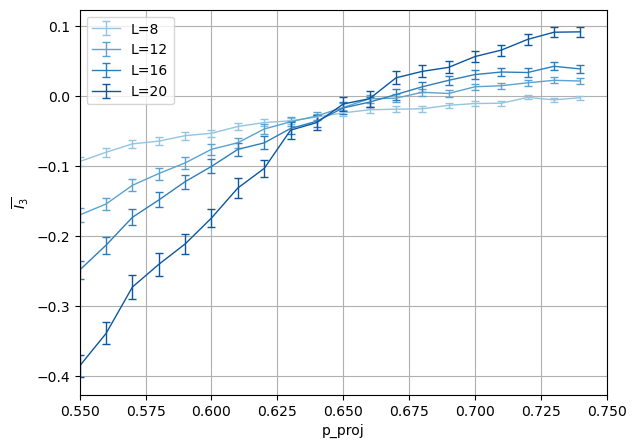

In [19]:
plot_line_inset(df=df_1_3_S0_sv[1e-15],
L_list=np.arange(8,24,4),inset1=False,
xlim1=[.28,.32],
ylim1=[.15,.4],
ax_inset_pos1=[.13,.45,.4,.3],inset2=False,
xlim2=[0.47,0.51],
ylim2=[.3,.5],
ax_inset_pos2=[.1,.3,.4,.5],metrics='TMI',
x_name='p_proj',
fixed_params={'p_ctrl':0.06},
yscale=None,
errorbar=True,
filename=None,
)
plt.gca().set_xlim([.55,.75])

In [50]:
dc=DataCollapse(df=df_1_3_S0_sv[1e-15],params={'Metrics':'TMI','p_ctrl':0.06},Lmin=12,Lmax=24,p_range=[0.55,0.75],p_dim=2)
dc.datacollapse(nu=1.3,p_c=0.651,)

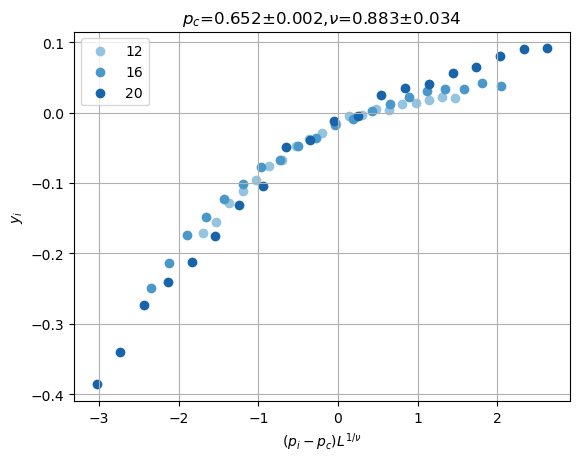

In [51]:
dc.plot_data_collapse()

In [ ]:
DOES NOT MAKE SENSE NOR FIT

(0.57, 0.77)

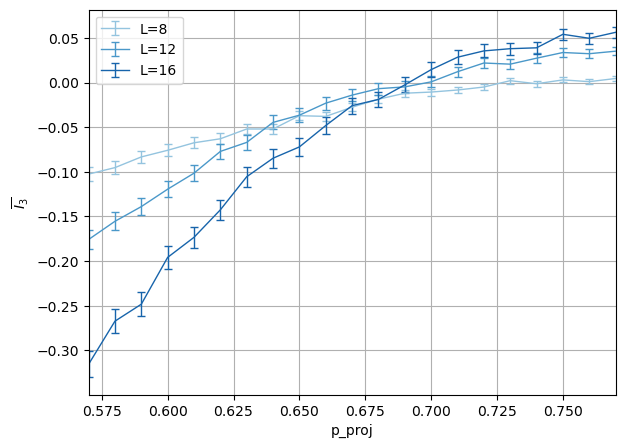

In [15]:
plot_line_inset(df=df_1_3_S0_sv[1e-15],
L_list=np.arange(8,20,4),inset1=False,
xlim1=[.28,.32],
ylim1=[.15,.4],
ax_inset_pos1=[.13,.45,.4,.3],inset2=False,
xlim2=[0.47,0.51],
ylim2=[.3,.5],
ax_inset_pos2=[.1,.3,.4,.5],metrics='TMI',
x_name='p_proj',
fixed_params={'p_ctrl':0.09},
yscale=None,
errorbar=True,
filename=None,
)
plt.gca().set_xlim([.57,.77])

(0.6, 0.8)

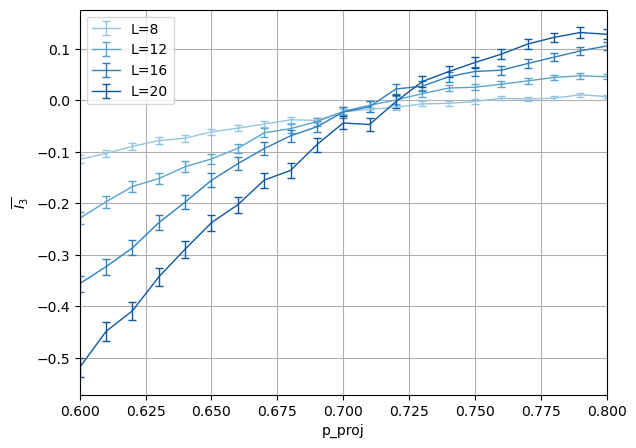

In [22]:
plot_line_inset(df=df_1_3_S0_sv[1e-15],
L_list=np.arange(8,24,4),inset1=False,
xlim1=[.28,.32],
ylim1=[.15,.4],
ax_inset_pos1=[.13,.45,.4,.3],inset2=False,
xlim2=[0.47,0.51],
ylim2=[.3,.5],
ax_inset_pos2=[.1,.3,.4,.5],metrics='TMI',
x_name='p_proj',
fixed_params={'p_ctrl':0.15},
yscale=None,
errorbar=True,
filename=None,
)
plt.gca().set_xlim([.6,.8])

In [81]:
dc=DataCollapse(df=df_1_3_S0_sv[1e-15],params={'Metrics':'TMI','p_ctrl':0.15},Lmin=12,Lmax=24,p_range=[0.55,0.75],p_dim=2)
dc.datacollapse(nu=1.3,p_c=0.701,)

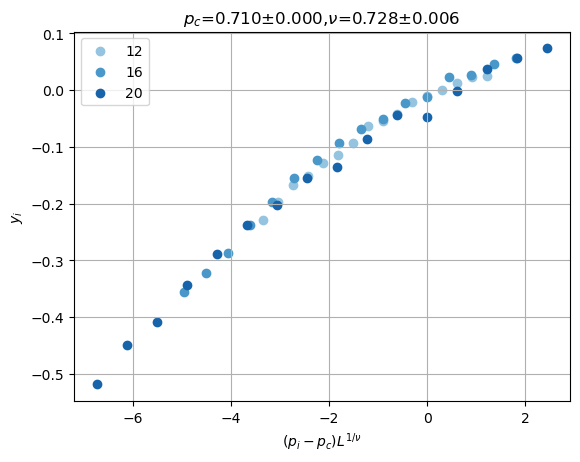

In [82]:
dc.plot_data_collapse()

(0.63, 0.83)

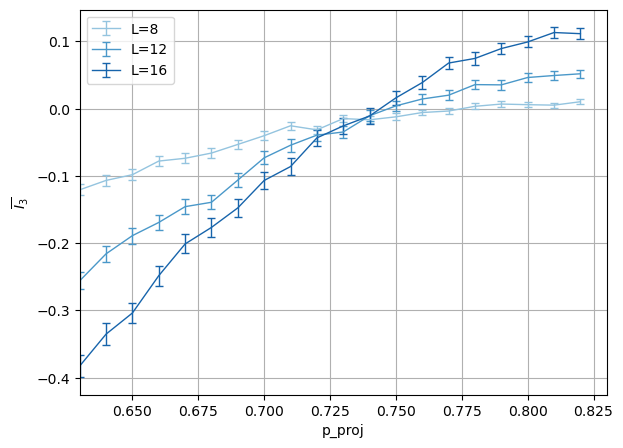

In [21]:
plot_line_inset(df=df_1_3_S0_sv[1e-15],
L_list=np.arange(8,20,4),inset1=False,
xlim1=[.28,.32],
ylim1=[.15,.4],
ax_inset_pos1=[.13,.45,.4,.3],inset2=False,
xlim2=[0.47,0.51],
ylim2=[.3,.5],
ax_inset_pos2=[.1,.3,.4,.5],metrics='TMI',
x_name='p_proj',
fixed_params={'p_ctrl':0.21},
yscale=None,
errorbar=True,
filename=None,
)
plt.gca().set_xlim([.63,.83])

(0.65, 0.85)

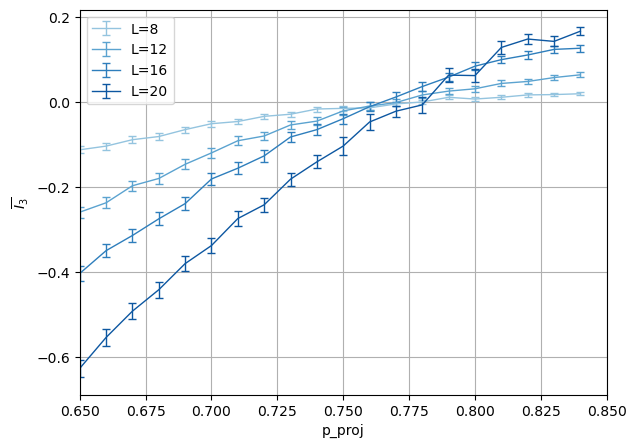

In [24]:
plot_line_inset(df=df_1_3_S0_sv[1e-15],
L_list=np.arange(8,24,4),inset1=False,
xlim1=[.28,.32],
ylim1=[.15,.4],
ax_inset_pos1=[.13,.45,.4,.3],inset2=False,
xlim2=[0.47,0.51],
ylim2=[.3,.5],
ax_inset_pos2=[.1,.3,.4,.5],metrics='TMI',
x_name='p_proj',
fixed_params={'p_ctrl':0.25},
yscale=None,
errorbar=True,
filename=None,
)
plt.gca().set_xlim([.65,.85])

In [36]:
dc=DataCollapse(df=df_1_3_S0_sv[1e-15],params={'Metrics':'TMI','p_ctrl':0.25},Lmin=12,Lmax=24,p_range=[.70,.85],p_dim=2)
dc.datacollapse(nu=1.3,p_c=0.761,)

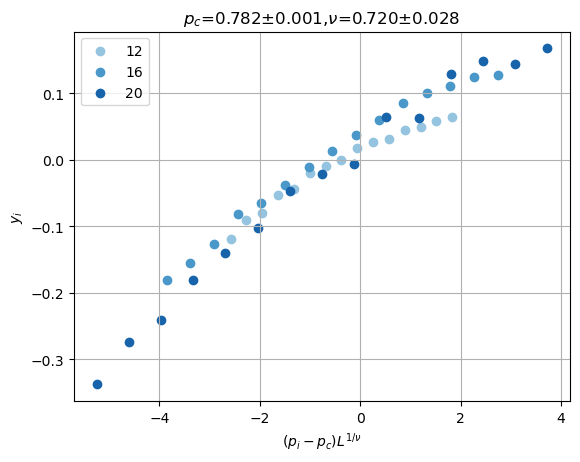

In [37]:
dc.plot_data_collapse()

(0.67, 0.87)

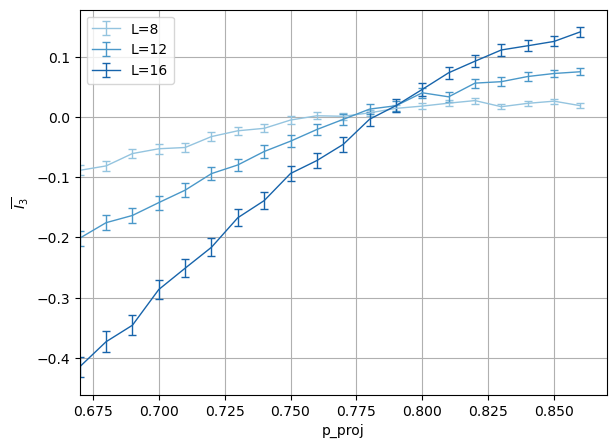

In [23]:
plot_line_inset(df=df_1_3_S0_sv[1e-15],
L_list=np.arange(8,20,4),inset1=False,
xlim1=[.28,.32],
ylim1=[.15,.4],
ax_inset_pos1=[.13,.45,.4,.3],inset2=False,
xlim2=[0.47,0.51],
ylim2=[.3,.5],
ax_inset_pos2=[.1,.3,.4,.5],metrics='TMI',
x_name='p_proj',
fixed_params={'p_ctrl':0.32},
yscale=None,
errorbar=True,
filename=None,
)
plt.gca().set_xlim([.67,.87])

(0.7, 0.9)

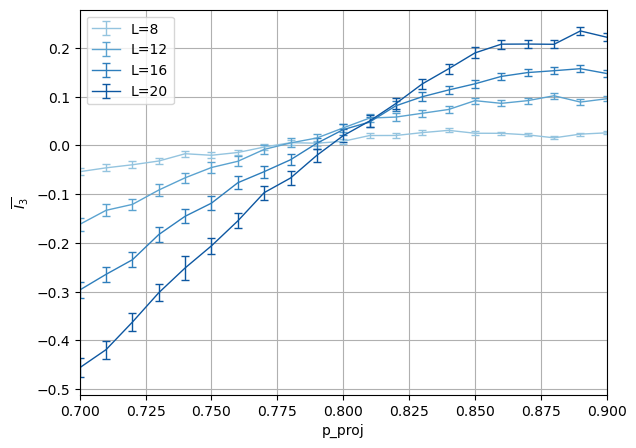

In [38]:
plot_line_inset(df=df_1_3_S0_sv[1e-15],
L_list=np.arange(8,24,4),inset1=False,
xlim1=[.28,.32],
ylim1=[.15,.4],
ax_inset_pos1=[.13,.45,.4,.3],inset2=False,
xlim2=[0.47,0.51],
ylim2=[.3,.5],
ax_inset_pos2=[.1,.3,.4,.5],metrics='TMI',
x_name='p_proj',
fixed_params={'p_ctrl':0.35},
yscale=None,
errorbar=True,
filename=None,
)
plt.gca().set_xlim([.7,.9])

In [41]:
dc=DataCollapse(df=df_1_3_S0_sv[1e-15],params={'Metrics':'TMI','p_ctrl':0.35},Lmin=12,Lmax=24,p_range=[.7,.9],p_dim=2)
dc.datacollapse(nu=1.3,p_c=0.801,)

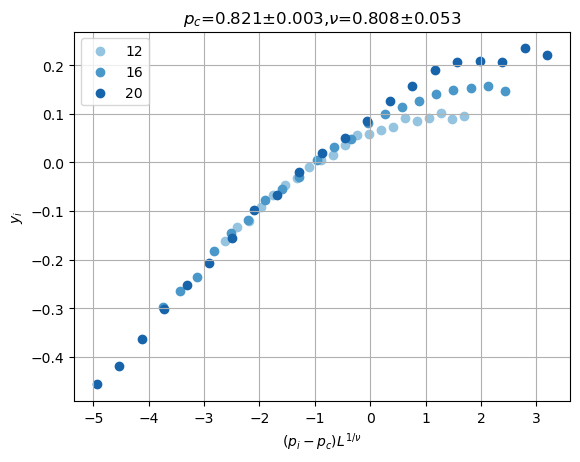

In [42]:
dc.plot_data_collapse()

(0.65, 0.85)

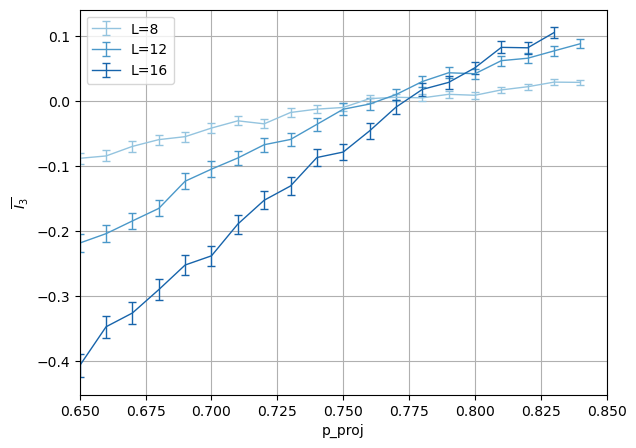

In [28]:
plot_line_inset(df=df_1_3_S0_sv[1e-15],
L_list=np.arange(8,20,4),inset1=False,
xlim1=[.28,.32],
ylim1=[.15,.4],
ax_inset_pos1=[.13,.45,.4,.3],inset2=False,
xlim2=[0.47,0.51],
ylim2=[.3,.5],
ax_inset_pos2=[.1,.3,.4,.5],metrics='TMI',
x_name='p_proj',
fixed_params={'p_ctrl':0.39},
yscale=None,
errorbar=True,
filename=None,
)
plt.gca().set_xlim([0.65,0.85])

(-0.3, 0.1)

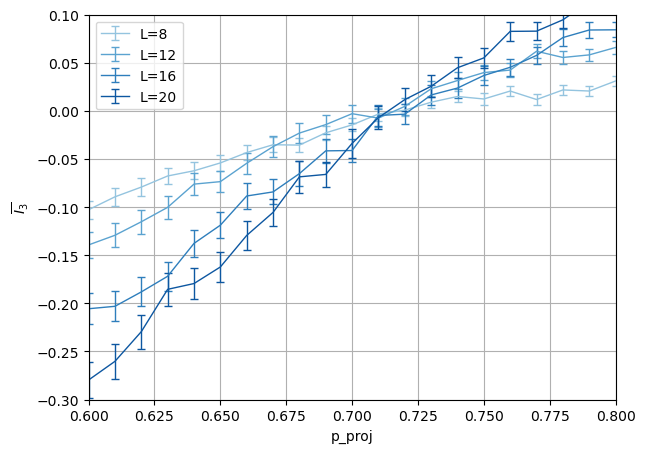

In [45]:
plot_line_inset(df=df_1_3_S0_sv[1e-15],
L_list=np.arange(8,24,4),inset1=False,
xlim1=[.28,.32],
ylim1=[.15,.4],
ax_inset_pos1=[.13,.45,.4,.3],inset2=False,
xlim2=[0.47,0.51],
ylim2=[.3,.5],
ax_inset_pos2=[.1,.3,.4,.5],metrics='TMI',
x_name='p_proj',
fixed_params={'p_ctrl':0.45},
yscale=None,
errorbar=True,
filename=None,
)
plt.gca().set_xlim([.6,.8])
plt.gca().set_ylim([-.3,.1])

In [47]:
dc=DataCollapse(df=df_1_3_S0_sv[1e-15],params={'Metrics':'TMI','p_ctrl':0.45},Lmin=12,Lmax=24,p_range=[.6,.8],p_dim=2)
dc.datacollapse(nu=1.3,p_c=0.701,)

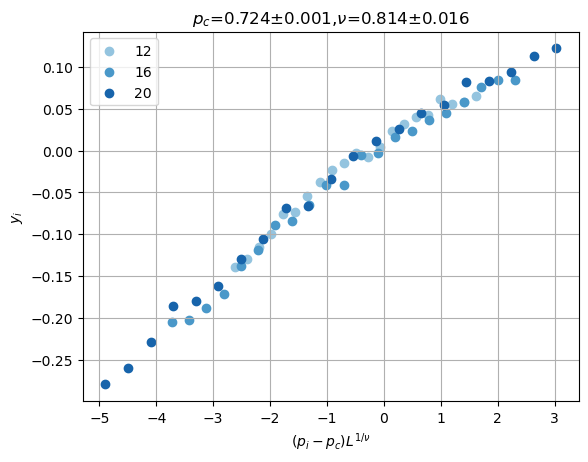

In [48]:
dc.plot_data_collapse()

# Extrapolation of fitting

100%|██████████| 12/12 [00:00<00:00, 107.32it/s]


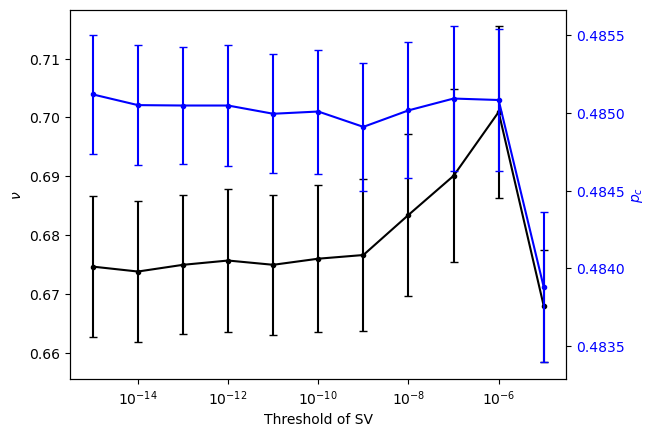

In [21]:
dc=extrapolate_fitting(data=df_1_3_S0_sv,params={'Metrics':'TMI','p_proj':0.00},p_range=[0.45,0.55],Lmin=12,Lmax=24,threshold=(1e-16,1),nu=1.3,p_c=0.471)

plot_extrapolate_fitting(dc)

100%|██████████| 12/12 [00:00<00:00, 112.58it/s]


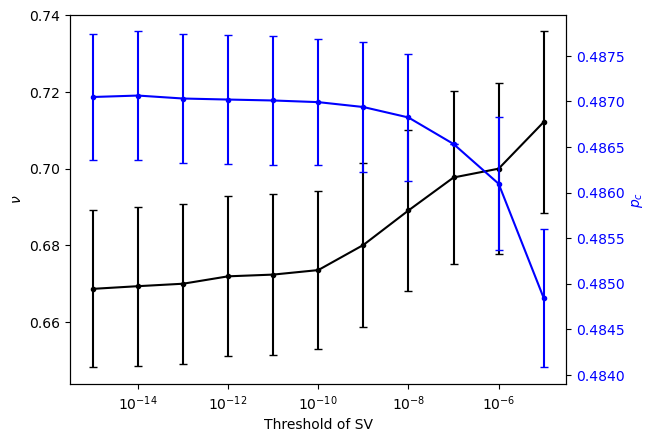

In [26]:
dc=extrapolate_fitting(data=df_1_3_S0_sv,params={'Metrics':'TMI','p_proj':0.15},p_range=[0.45,0.55],Lmin=12,Lmax=24,threshold=(1e-16,1),nu=1.3,p_c=0.471)
plot_extrapolate_fitting(dc)

100%|██████████| 12/12 [00:00<00:00, 115.50it/s]


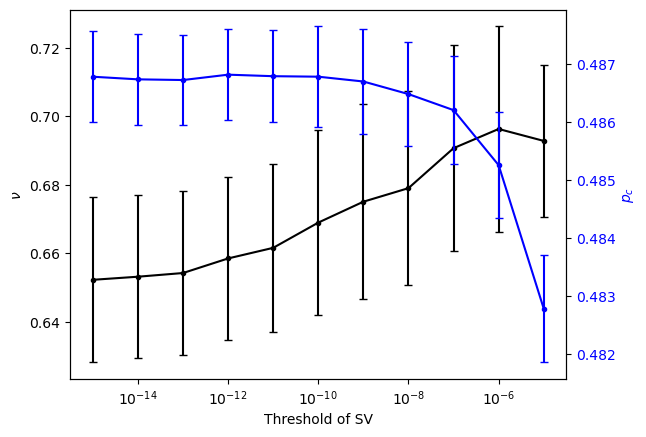

In [34]:
dc=extrapolate_fitting(data=df_1_3_S0_sv,params={'Metrics':'TMI','p_proj':0.27},p_range=[0.45,0.55],Lmin=12,Lmax=24,threshold=(1e-16,1),nu=1.3,p_c=0.471)
plot_extrapolate_fitting(dc)

100%|██████████| 12/12 [00:00<00:00, 102.72it/s]


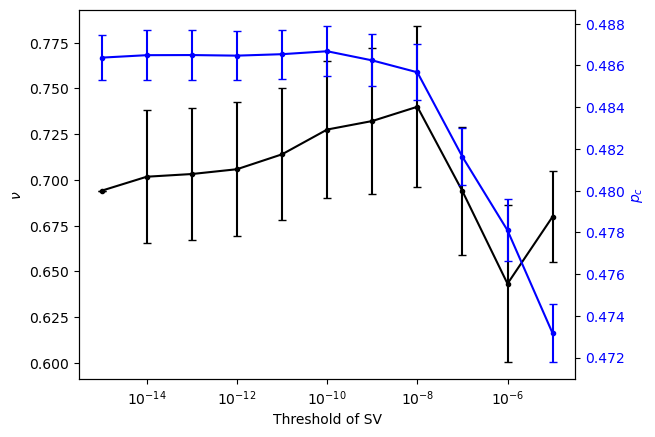

In [30]:
dc=extrapolate_fitting(data=df_1_3_S0_sv,params={'Metrics':'TMI','p_proj':0.45},p_range=[0.45,0.55],Lmin=12,Lmax=24,threshold=(1e-16,1),nu=1.3,p_c=0.451)
plot_extrapolate_fitting(dc)

100%|██████████| 12/12 [00:00<00:00, 74.99it/s]


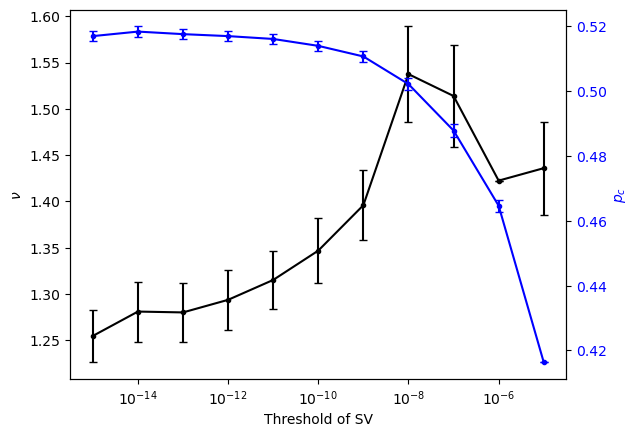

In [44]:
dc=extrapolate_fitting(data=df_1_3_S0_sv,params={'Metrics':'TMI','p_ctrl':0.},p_range=[0.4,0.6],Lmin=12,Lmax=24,threshold=(1e-16,1),nu=1.3,p_c=0.501)
plot_extrapolate_fitting(dc)

In [ ]:
This is probably because it misses L=20 and beyond
Ok after adding L=20, it becomes better, I guess I need some example of L=24

100%|██████████| 12/12 [00:00<00:00, 51.89it/s]


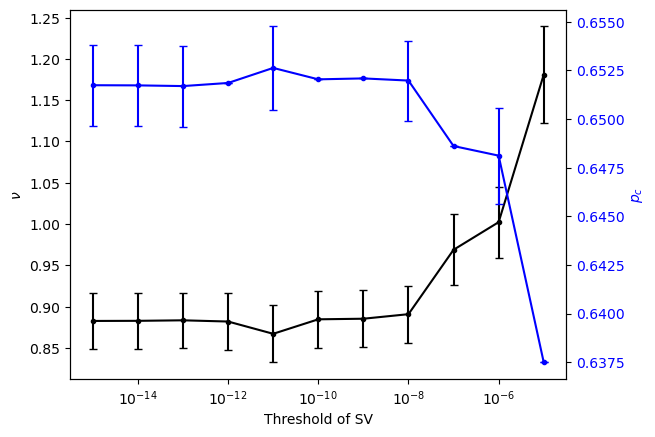

In [47]:
dc=extrapolate_fitting(data=df_1_3_S0_sv,params={'Metrics':'TMI','p_ctrl':0.06},p_range=[0.55,0.75],Lmin=12,Lmax=24,threshold=(1e-16,1),nu=1.3,p_c=0.651)
plot_extrapolate_fitting(dc)

100%|██████████| 12/12 [00:00<00:00, 52.76it/s]

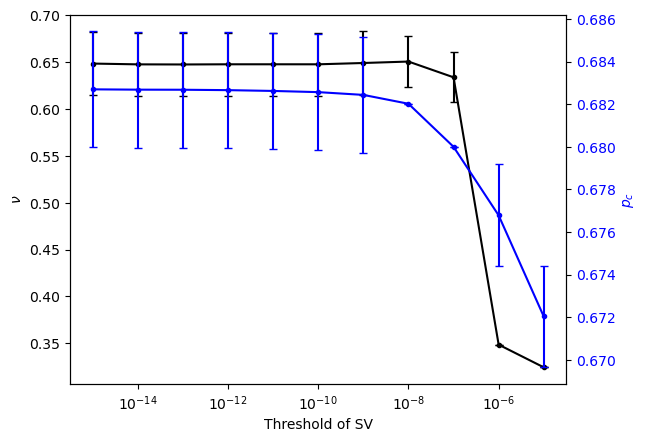

In [18]:
dc=extrapolate_fitting(data=df_1_3_S0_sv,params={'Metrics':'TMI','p_ctrl':0.09},p_range=[0.57,0.77],Lmin=12,Lmax=24,threshold=(1e-16,1),nu=1.3,p_c=0.651)
plot_extrapolate_fitting(dc)

100%|██████████| 12/12 [00:00<00:00, 65.64it/s]


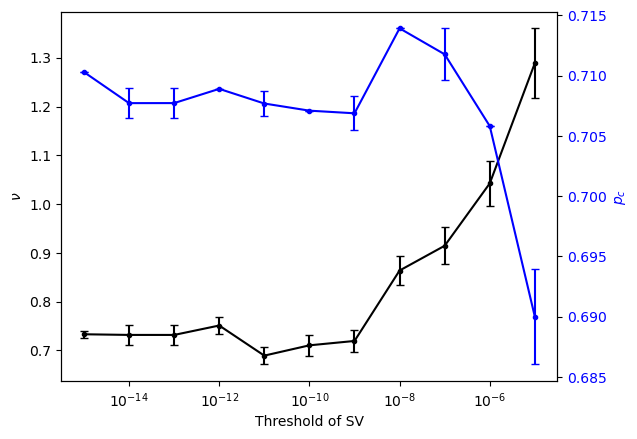

In [23]:
dc=extrapolate_fitting(data=df_1_3_S0_sv,params={'Metrics':'TMI','p_ctrl':0.15},p_range=[.6,.8],Lmin=12,Lmax=24,threshold=(1e-16,1),nu=1.3,p_c=0.701)
plot_extrapolate_fitting(dc)

100%|██████████| 12/12 [00:00<00:00, 95.66it/s]


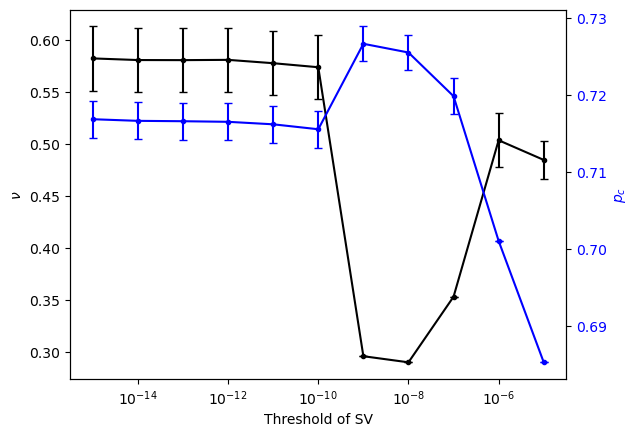

In [22]:
dc=extrapolate_fitting(data=df_1_3_S0_sv,params={'Metrics':'TMI','p_ctrl':0.21},p_range=[.63,.83],Lmin=12,Lmax=24,threshold=(1e-16,1),nu=1.3,p_c=0.701)
plot_extrapolate_fitting(dc)

100%|██████████| 12/12 [00:00<00:00, 65.74it/s]


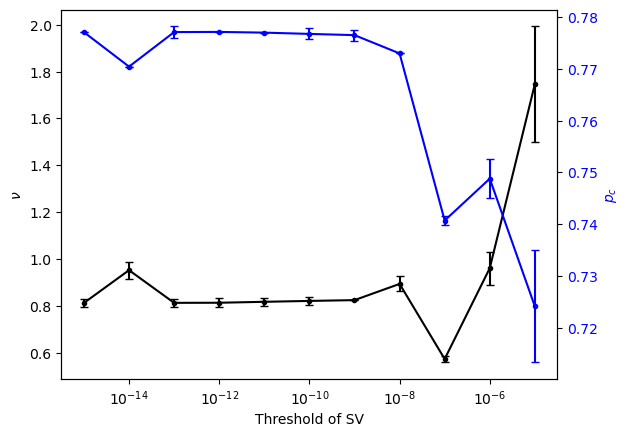

In [25]:
dc=extrapolate_fitting(data=df_1_3_S0_sv,params={'Metrics':'TMI','p_ctrl':0.25},p_range=[0.65,0.85],Lmin=12,Lmax=24,threshold=(1e-16,1),nu=1.3,p_c=0.761)
plot_extrapolate_fitting(dc)

100%|██████████| 12/12 [00:00<00:00, 80.19it/s]


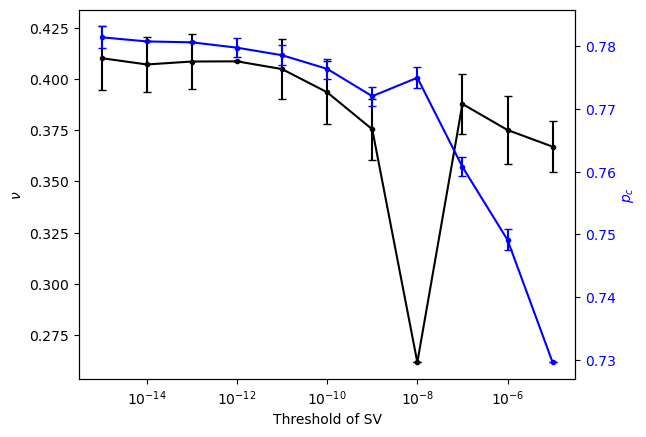

In [27]:
dc=extrapolate_fitting(data=df_1_3_S0_sv,params={'Metrics':'TMI','p_ctrl':0.32},p_range=[.67,.87],Lmin=12,Lmax=24,threshold=(1e-16,1),nu=1.3,p_c=0.781)
plot_extrapolate_fitting(dc)

100%|██████████| 12/12 [00:00<00:00, 65.89it/s]


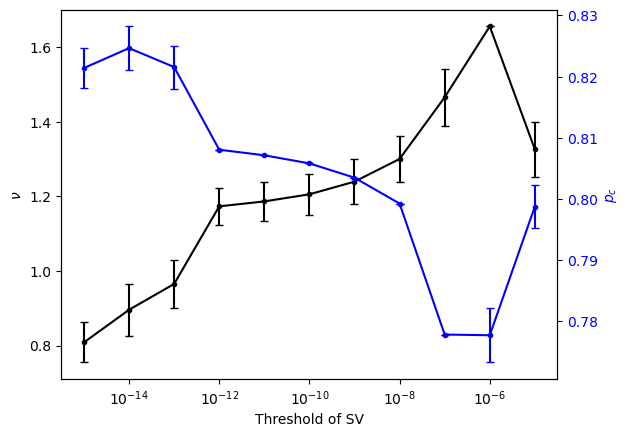

In [43]:
dc=extrapolate_fitting(data=df_1_3_S0_sv,params={'Metrics':'TMI','p_ctrl':0.35},p_range=[0.7,0.9],Lmin=12,Lmax=24,threshold=(1e-16,1),nu=1.3,p_c=0.801)
plot_extrapolate_fitting(dc)

100%|██████████| 12/12 [00:00<00:00, 83.63it/s]


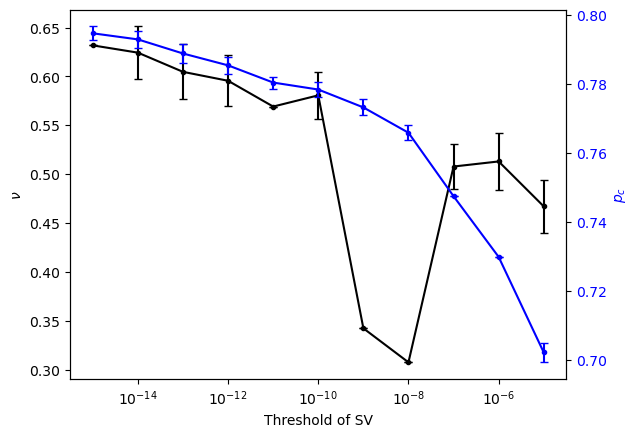

In [29]:
dc=extrapolate_fitting(data=df_1_3_S0_sv,params={'Metrics':'TMI','p_ctrl':0.39},p_range=[0.65,0.85],Lmin=12,Lmax=24,threshold=(1e-16,1),nu=1.3,p_c=0.771)
plot_extrapolate_fitting(dc)

100%|██████████| 12/12 [00:00<00:00, 62.80it/s]


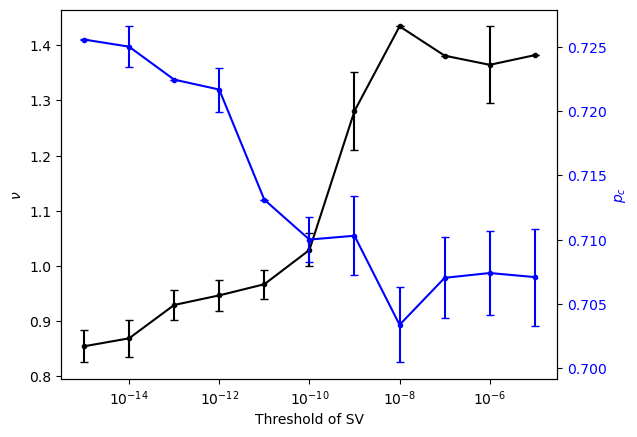

In [49]:
dc=extrapolate_fitting(data=df_1_3_S0_sv,params={'Metrics':'TMI','p_ctrl':0.45},p_range=[0.6,0.8],Lmin=12,Lmax=24,threshold=(1e-16,1),nu=1.3,p_c=0.711)
plot_extrapolate_fitting(dc)

In [ ]:
It looks like it is just very robustly nu~0.5, why??
possible reasons: 1. finite size effect
2. too large fluctuation, too small ensemble
3. range too small?

But Justin told me the stat mech model gives very stable 1
-- ok he means the model without addder


In [42]:
df_1_3_S0_sv[1e-15].xs(key=0,level='p_ctrl')

observations
Metrics L  p_proj                                                   
O       8  0.40    [0.02921332949938645, 0.13566310047833696, 0.1...
TMI     8  0.40    [0.0, 0.0, -0.6931471824645996, 0.0, 0.0, 0.0,...
EE      8  0.40    [0.6931471824645996, 0.6931471824645996, 1.386...
O       12 0.40    [0.13694142990219194, 0.045601165319498795, 0....
TMI     12 0.40    [0.0, 0.0, 0.0, -0.6931471824645996, 0.0, 0.0,...
...                                                              ...
           0.59    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.693147182464...
EE      12 0.59    [0.6931471824645996, 0.0, 0.0, 0.0, 0.0, 0.693...
O       16 0.59    [-0.04946512466252699, -0.07592745528008005, -...
TMI     16 0.59    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
EE      16 0.59    [0.0, 0.6931471824645996, 0.6931471824645996, ...

[180 rows x 1 columns]

## Plot

### TMI mean

In [12]:
import matplotlib.pyplot as plt

(0.4, 0.6)

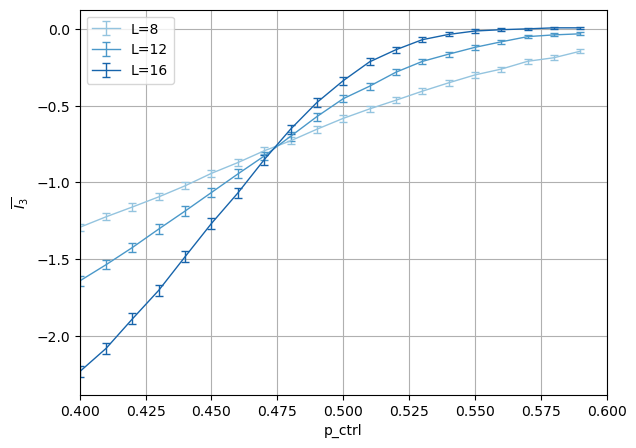

In [19]:
plot_line_inset(df=df_1_3_S0,
L_list=np.arange(8,20,4),inset1=False,
xlim1=[.28,.32],
ylim1=[.15,.4],
ax_inset_pos1=[.13,.45,.4,.3],inset2=False,
xlim2=[0.47,0.51],
ylim2=[.3,.5],
ax_inset_pos2=[.1,.3,.4,.5],metrics='TMI',
x_name='p_ctrl',
fixed_params={'p_proj':0},
yscale=None,
errorbar=True,
filename=None,
)
plt.gca().set_xlim([.4,.6])

(0.4, 0.6)

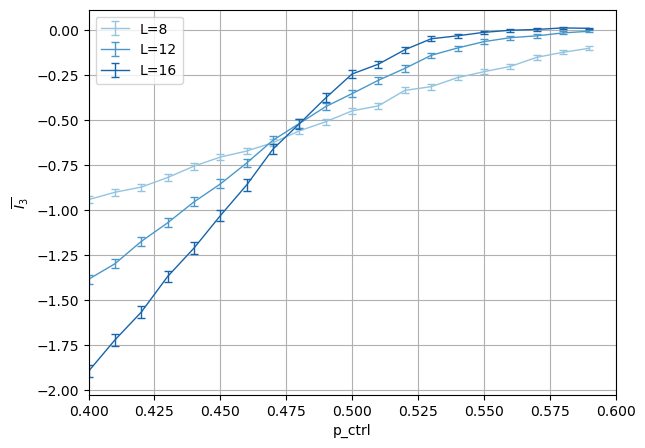

In [24]:
plot_line_inset(df=df_1_3_S0,
L_list=np.arange(8,20,4),inset1=False,
xlim1=[.28,.32],
ylim1=[.15,.4],
ax_inset_pos1=[.13,.45,.4,.3],inset2=False,
xlim2=[0.47,0.51],
ylim2=[.3,.5],
ax_inset_pos2=[.1,.3,.4,.5],metrics='TMI',
x_name='p_ctrl',
fixed_params={'p_proj':0.15},
yscale=None,
errorbar=True,
filename=None,
)
plt.gca().set_xlim([.4,.6])

(0.4, 0.6)

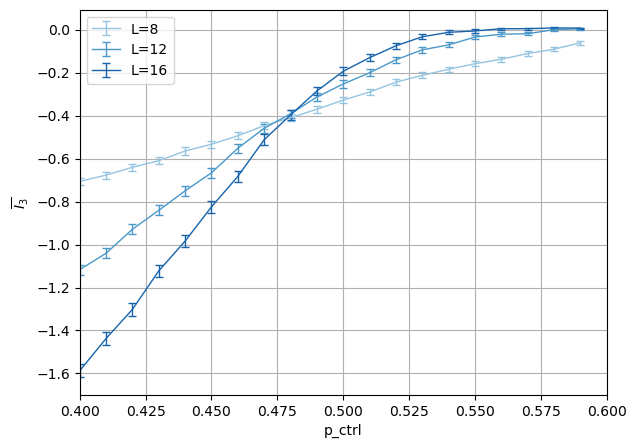

In [30]:
plot_line_inset(df=df_1_3_S0,
L_list=np.arange(8,20,4),inset1=False,
xlim1=[.28,.32],
ylim1=[.15,.4],
ax_inset_pos1=[.13,.45,.4,.3],inset2=False,
xlim2=[0.47,0.51],
ylim2=[.3,.5],
ax_inset_pos2=[.1,.3,.4,.5],metrics='TMI',
x_name='p_ctrl',
fixed_params={'p_proj':0.27},
yscale=None,
errorbar=True,
filename=None,
)
plt.gca().set_xlim([.4,.6])

(0.4, 0.6)

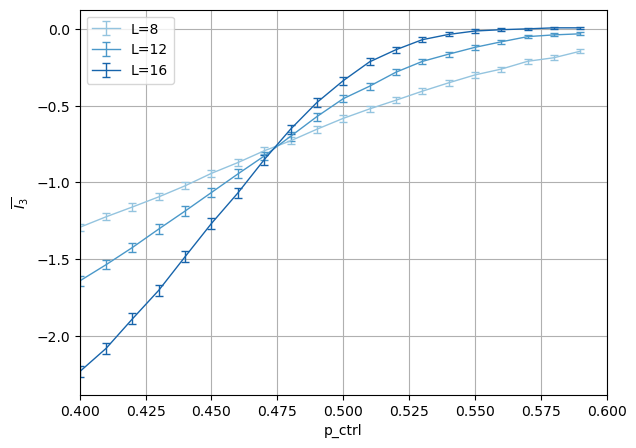

In [16]:
plot_line_inset(df=df_1_3_S0_sv[1e-6],
L_list=np.arange(8,20,4),inset1=False,
xlim1=[.28,.32],
ylim1=[.15,.4],
ax_inset_pos1=[.13,.45,.4,.3],inset2=False,
xlim2=[0.47,0.51],
ylim2=[.3,.5],
ax_inset_pos2=[.1,.3,.4,.5],metrics='TMI',
x_name='p_ctrl',
fixed_params={'p_proj':0},
yscale=None,
errorbar=True,
filename=None,
)
plt.gca().set_xlim([.4,.6])

# Fit with largest cutoff 1e-15

In [13]:
dc_TMI_opt=optimal_df(names=['Metrics', 'p_proj', 'p_ctrl'])

### TMI mean

##### $p_{proj}$=0.00

In [14]:
dc=DataCollapse(df=df_1_3_S0_sv[1e-15],params={'Metrics':'TMI','p_proj':0},Lmin=12,Lmax=24,p_range=[0.45,0.55],p_dim=2)
dc.datacollapse(nu=1.,p_c=0.481,)

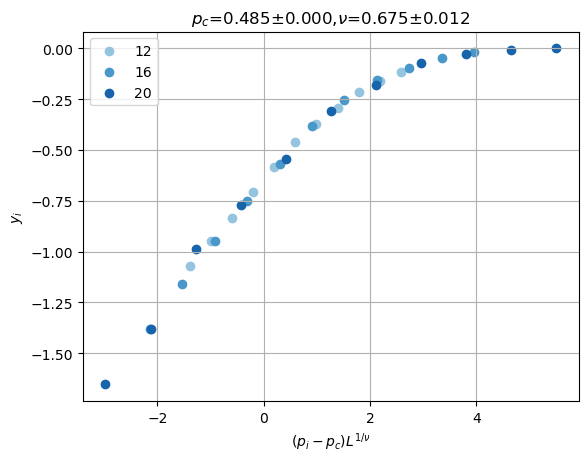

In [15]:
dc.plot_data_collapse()

In [62]:
optimal_AFM_TMI_S0=add_optimal(optimal_AFM_TMI_S0,dc)

##### $p_{proj}$=0.15

In [17]:
dc=DataCollapse(df=df_1_3_S0_sv[1e-15],params={'Metrics':'TMI','p_proj':0.15},Lmin=12,Lmax=24,p_range=[0.4,0.58],p_dim=2)
dc.datacollapse(nu=.6,p_c=0.471,)

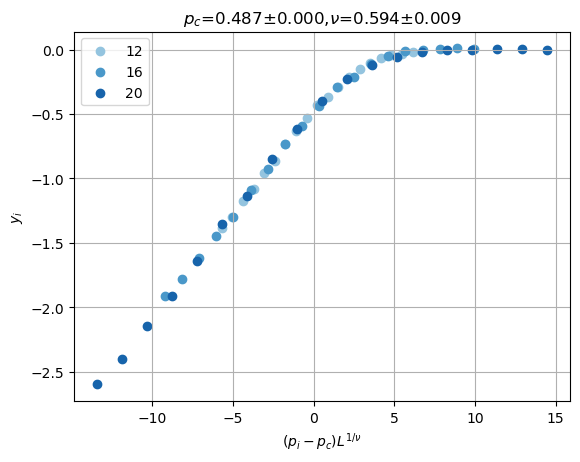

In [18]:
dc.plot_data_collapse()

In [65]:
optimal_AFM_TMI_S0=add_optimal(optimal_AFM_TMI_S0,dc,)

##### $p_{proj}$=0.27

In [19]:
dc=DataCollapse(df=df_1_3_S0_sv[1e-15],params={'Metrics':'TMI','p_proj':0.27},Lmin=12,Lmax=24,p_range=[0.4,0.58],p_dim=2)
dc.datacollapse(nu=.7,p_c=0.471,)

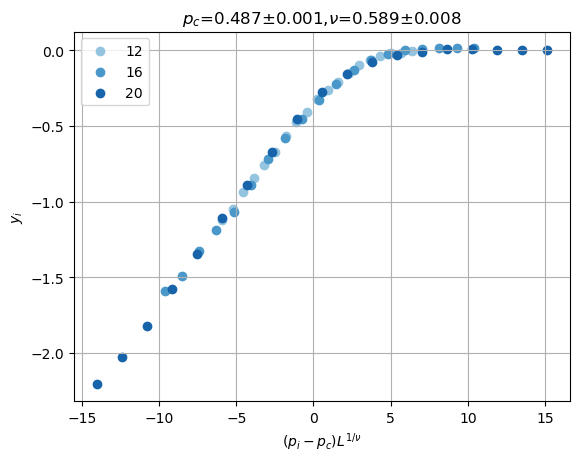

In [20]:
dc.plot_data_collapse()

In [68]:
optimal_AFM_TMI_S0=add_optimal(optimal_AFM_TMI_S0,dc,)

##### $p_{proj}$=0.45

In [21]:
dc=DataCollapse(df=df_1_3_S0_sv[1e-15],params={'Metrics':'TMI','p_proj':0.45},Lmin=12,Lmax=24,p_range=[0.4,0.58],p_dim=2)
dc.datacollapse(nu=.7,p_c=0.471,)

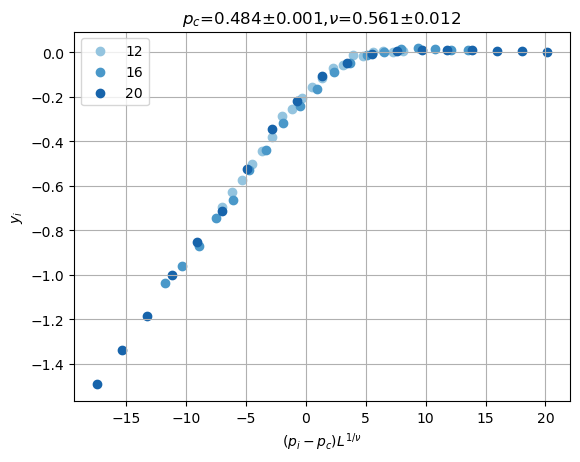

In [22]:
dc.plot_data_collapse()

In [71]:
optimal_AFM_TMI_S0=add_optimal(optimal_AFM_TMI_S0,dc,)

##### $p_{ctrl}$=0.0

In [23]:
dc=DataCollapse(df=df_1_3_S0_sv[1e-15],params={'Metrics':'TMI','p_ctrl':0.},Lmin=12,Lmax=24,p_range=[0.4,0.58],p_dim=2)
dc.datacollapse(nu=1.3,p_c=0.511,)

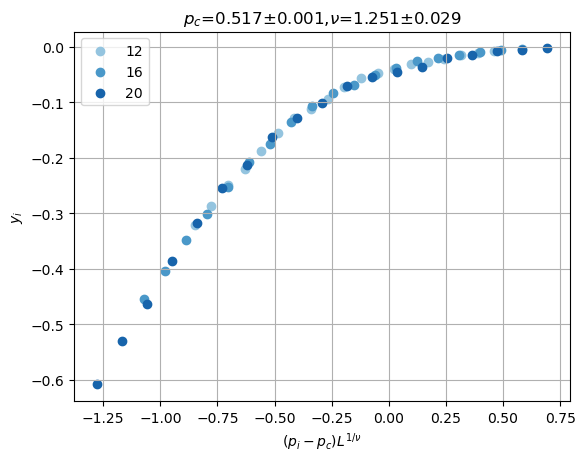

In [24]:
dc.plot_data_collapse()

In [74]:
optimal_AFM_TMI_S0=add_optimal(optimal_AFM_TMI_S0,dc,)

##### $p_{ctrl}$=0.06

In [25]:
dc=DataCollapse(df=df_1_3_S0_sv[1e-15],params={'Metrics':'TMI','p_ctrl':0.06},Lmin=12,Lmax=24,p_range=[.55,.75],p_dim=2)
dc.datacollapse(nu=1.3,p_c=0.651,)

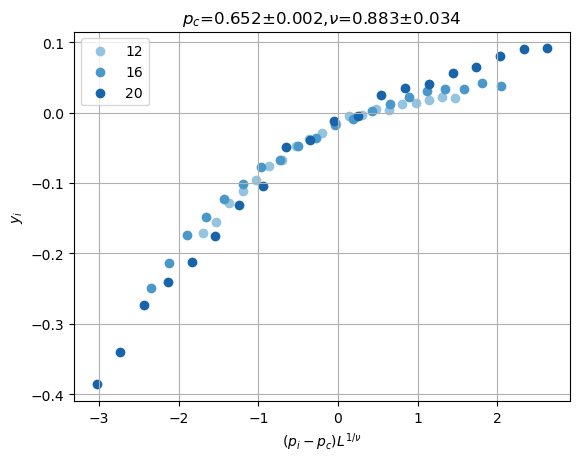

In [26]:
dc.plot_data_collapse()

In [27]:
optimal_AFM_TMI_S0=add_optimal(optimal_AFM_TMI_S0,dc,)

NameError: name 'add_optimal' is not defined

##### $p_{ctrl}$=0.09

In [28]:
dc=DataCollapse(df=df_1_3_S0_sv[1e-15],params={'Metrics':'TMI','p_ctrl':0.09},Lmin=12,Lmax=24,p_range=[.57,.77],p_dim=2)
dc.datacollapse(nu=1.3,p_c=0.675,)

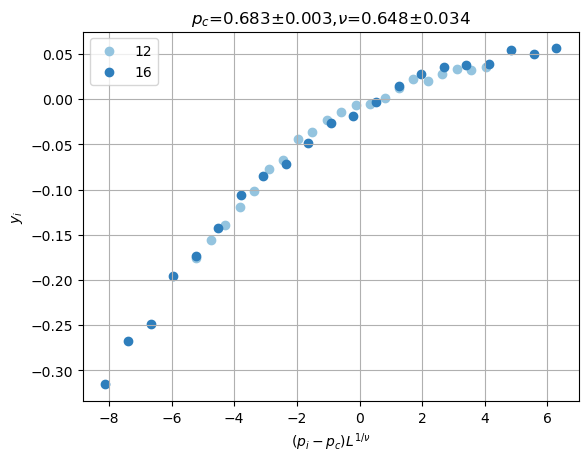

In [29]:
dc.plot_data_collapse()

In [80]:
optimal_AFM_TMI_S0=add_optimal(optimal_AFM_TMI_S0,dc,)

##### $p_{ctrl}$=0.15

In [30]:
dc=DataCollapse(df=df_1_3_S0_sv[1e-15],params={'Metrics':'TMI','p_ctrl':0.15},Lmin=12,Lmax=24,p_range=[0.55,0.75],p_dim=2)
dc.datacollapse(nu=1.3,p_c=0.701,)

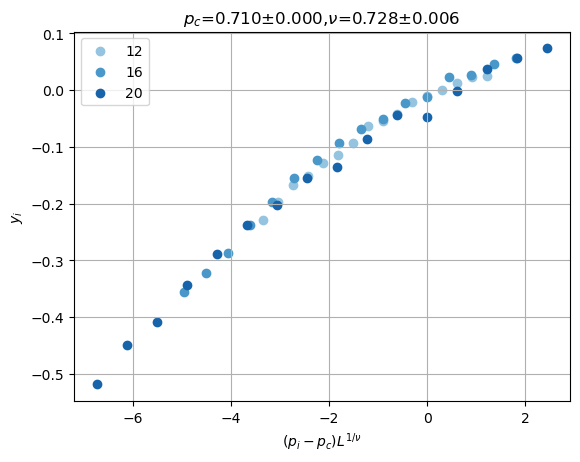

In [31]:
dc.plot_data_collapse()

In [85]:
optimal_AFM_TMI_S0=add_optimal(optimal_AFM_TMI_S0,dc,)

##### $p_{ctrl}$=0.21

In [32]:
dc=DataCollapse(df=df_1_3_S0_sv[1e-15],params={'Metrics':'TMI','p_ctrl':0.21},Lmin=12,Lmax=24,p_range=[.63,.83],p_dim=2)
dc.datacollapse(nu=1.3,p_c=0.721,)

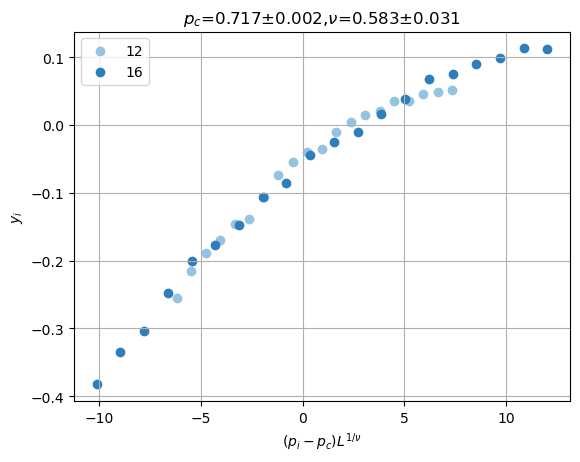

In [33]:
dc.plot_data_collapse()

In [88]:
optimal_AFM_TMI_S0=add_optimal(optimal_AFM_TMI_S0,dc,)

##### $p_{ctrl}$=0.25

In [34]:
dc=DataCollapse(df=df_1_3_S0_sv[1e-15],params={'Metrics':'TMI','p_ctrl':0.25},Lmin=12,Lmax=24,p_range=[.70,.85],p_dim=2)
dc.datacollapse(nu=1.3,p_c=0.761,)

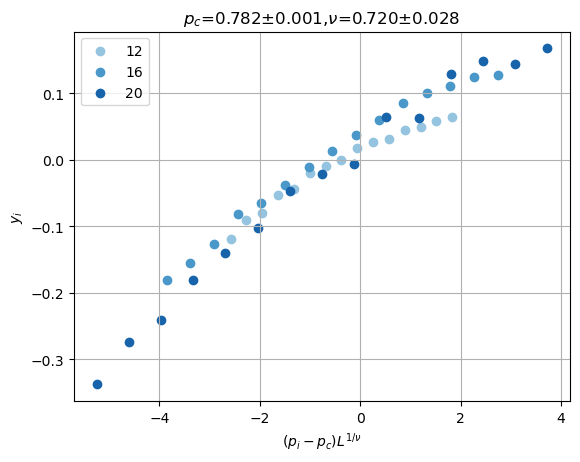

In [104]:
dc.plot_data_collapse()

In [105]:
optimal_AFM_TMI_S0=add_optimal(optimal_AFM_TMI_S0,dc,)

##### $p_{ctrl}$=0.32

In [35]:
dc=DataCollapse(df=df_1_3_S0_sv[1e-15],params={'Metrics':'TMI','p_ctrl':0.32},Lmin=12,Lmax=24,p_range=[.67,.87],p_dim=2)
dc.datacollapse(nu=1.3,p_c=0.783,)

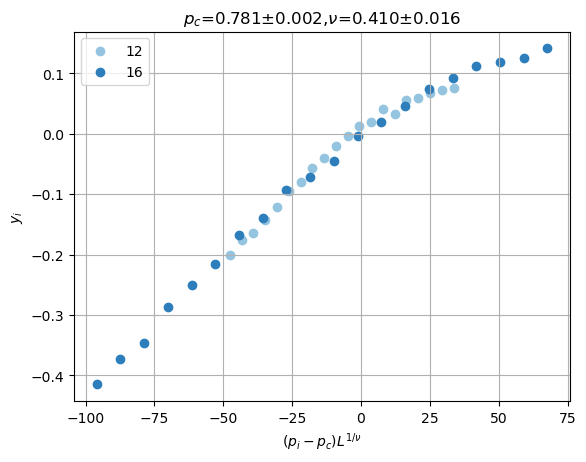

In [36]:
dc.plot_data_collapse()

In [110]:
optimal_AFM_TMI_S0=add_optimal(optimal_AFM_TMI_S0,dc,)

##### $p_{ctrl}$=0.35

In [37]:
dc=DataCollapse(df=df_1_3_S0_sv[1e-15],params={'Metrics':'TMI','p_ctrl':0.35},Lmin=12,Lmax=24,p_range=[.7,.85],p_dim=2)
dc.datacollapse(nu=1.3,p_c=0.801,)

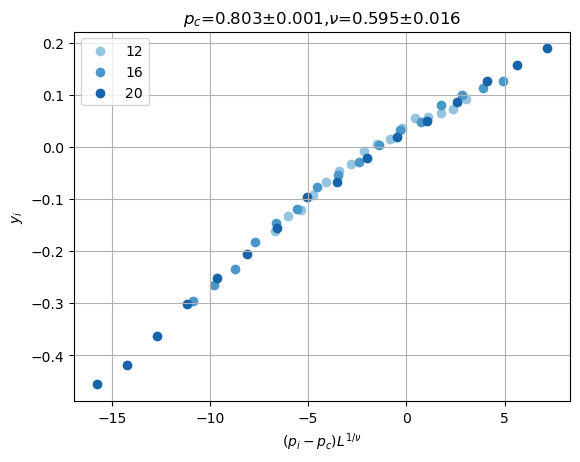

In [114]:
dc.plot_data_collapse()

In [115]:
optimal_AFM_TMI_S0=add_optimal(optimal_AFM_TMI_S0,dc,)

##### $p_{ctrl}$=0.39

In [38]:
dc=DataCollapse(df=df_1_3_S0_sv[1e-15],params={'Metrics':'TMI','p_ctrl':0.39},Lmin=12,Lmax=24,p_range=[.65,.85],p_dim=2)
dc.datacollapse(nu=1.3,p_c=0.751,)

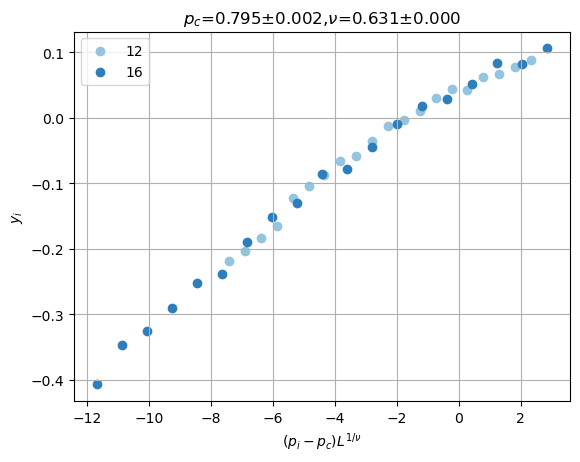

In [117]:
dc.plot_data_collapse()

In [118]:
optimal_AFM_TMI_S0=add_optimal(optimal_AFM_TMI_S0,dc,)

##### $p_{ctrl}$=0.45

In [39]:
dc=DataCollapse(df=df_1_3_S0_sv[1e-15],params={'Metrics':'TMI','p_ctrl':0.45},Lmin=12,Lmax=24,p_range=[.6,.8],p_dim=2)
dc.datacollapse(nu=1.3,p_c=0.701,)

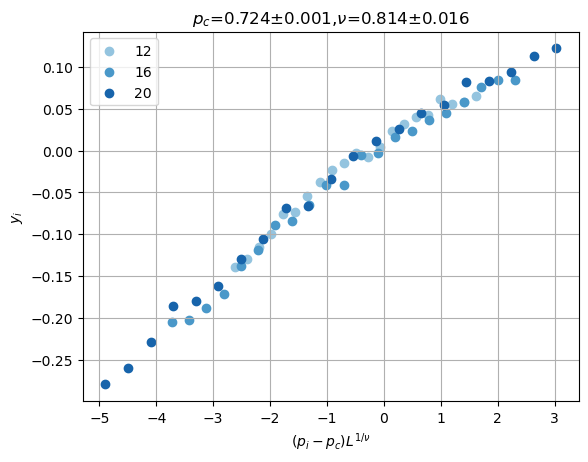

In [40]:
dc.plot_data_collapse()

In [41]:
optimal_AFM_TMI_S0=add_optimal(optimal_AFM_TMI_S0,dc,)

NameError: name 'add_optimal' is not defined

In [122]:
with open('datacollapse_1_3_S0.pickle','wb') as f:
    pickle.dump(optimal_AFM_TMI_S0,f)

In [ ]:
---

##### $p_{proj}$=0.15

In [42]:
dc=DataCollapse(df=df_1_3_S0,params={'Metrics':'TMI','p_proj':0.15},Lmin=8,Lmax=24,p_range=[0.4,0.58],p_dim=2)
dc.datacollapse(nu=1.,p_c=0.471,)

NameError: name 'df_1_3_S0' is not defined

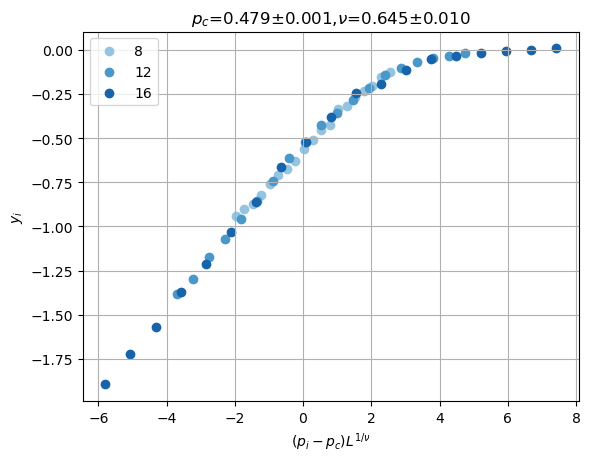

In [ ]:
dc.plot_data_collapse()